In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm , skew

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('Test.csv')

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df=train.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
piv=df.pivot_table(values='Item_Weight',index='Item_Identifier',aggfunc='mean')

In [19]:
piv

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [41]:
piv1=df.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
piv1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [45]:
null_Item_Weight=df['Item_Weight'].isnull()
for i, item in enumerate(df['Item_Identifier']):
    if null_Item_Weight[i]:
        if item in piv.index:
            df['Item_Weight'][i]=piv.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=df['Item_Weight'].mean()

In [47]:
null_Outlet_Size=df['Outlet_Size'].isnull()
df.loc[null_Outlet_Size,'Outlet_Size']=df.loc[null_Outlet_Size,'Outlet_Type'].apply(lambda x:piv1[x])

In [49]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
num_cols=[]
for i in df.columns:
    if df[i].dtypes==int or df[i].dtypes==float:
        num_cols.append(i)

In [58]:
obj_cols=[]
for i in df.columns:
    if df[i].dtypes=='object' :
        obj_cols.append(i)

In [59]:
obj_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [60]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

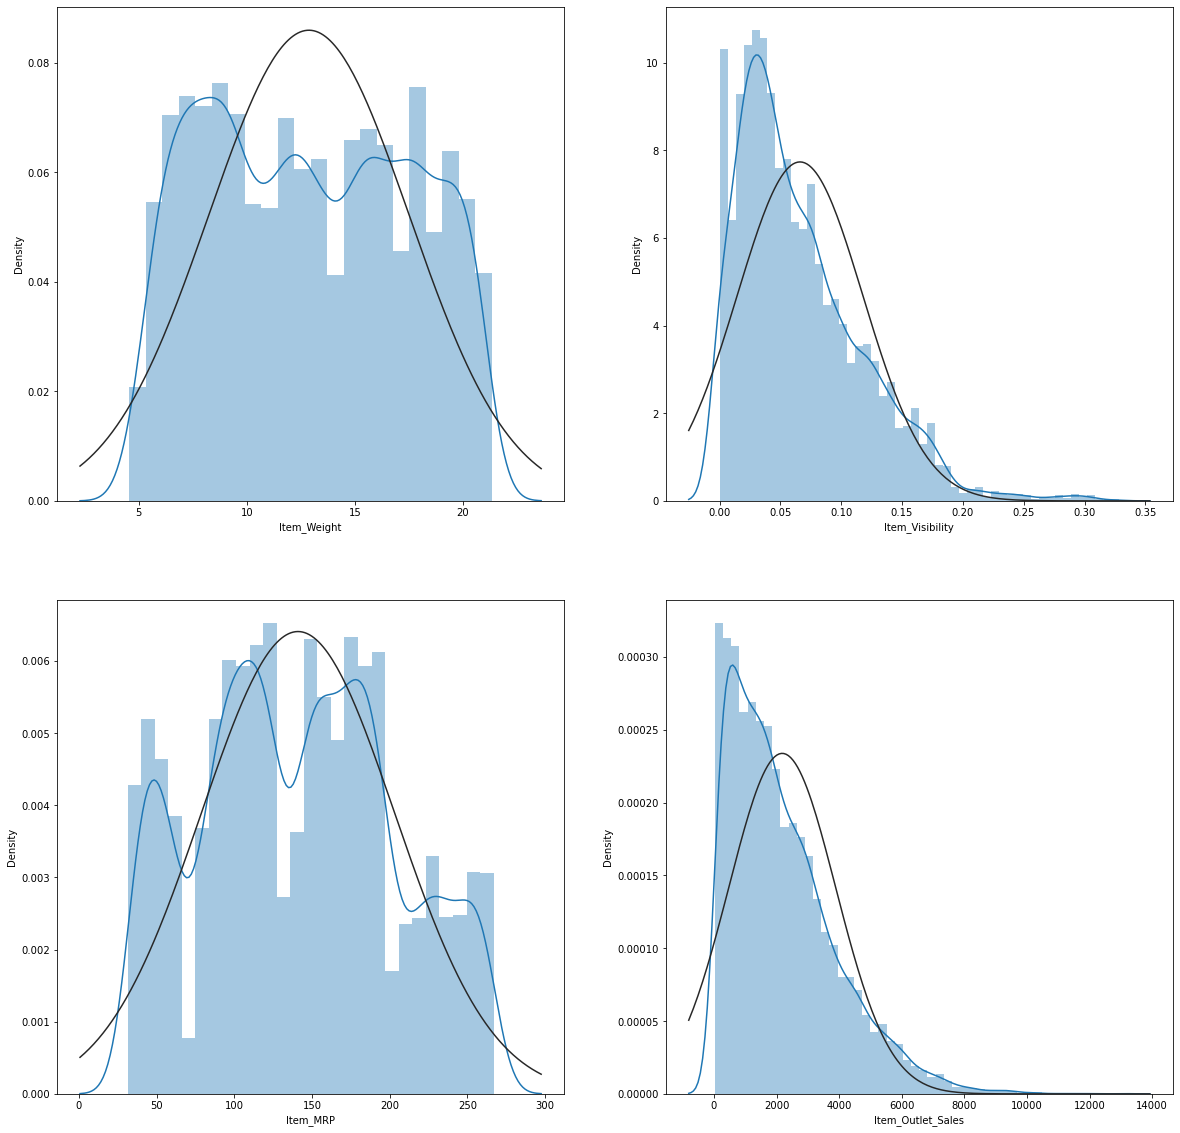

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20, 20))
ax=ax.flatten()
index=0
for i in num_cols:
    sns.distplot(df[i],fit=norm,ax=ax[index])
    index=index+1

In [83]:
skewness=skew(df[num_cols])

In [86]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])

In [87]:
df['Item_Outlet_Sales']=np.log1p(df['Item_Outlet_Sales'])

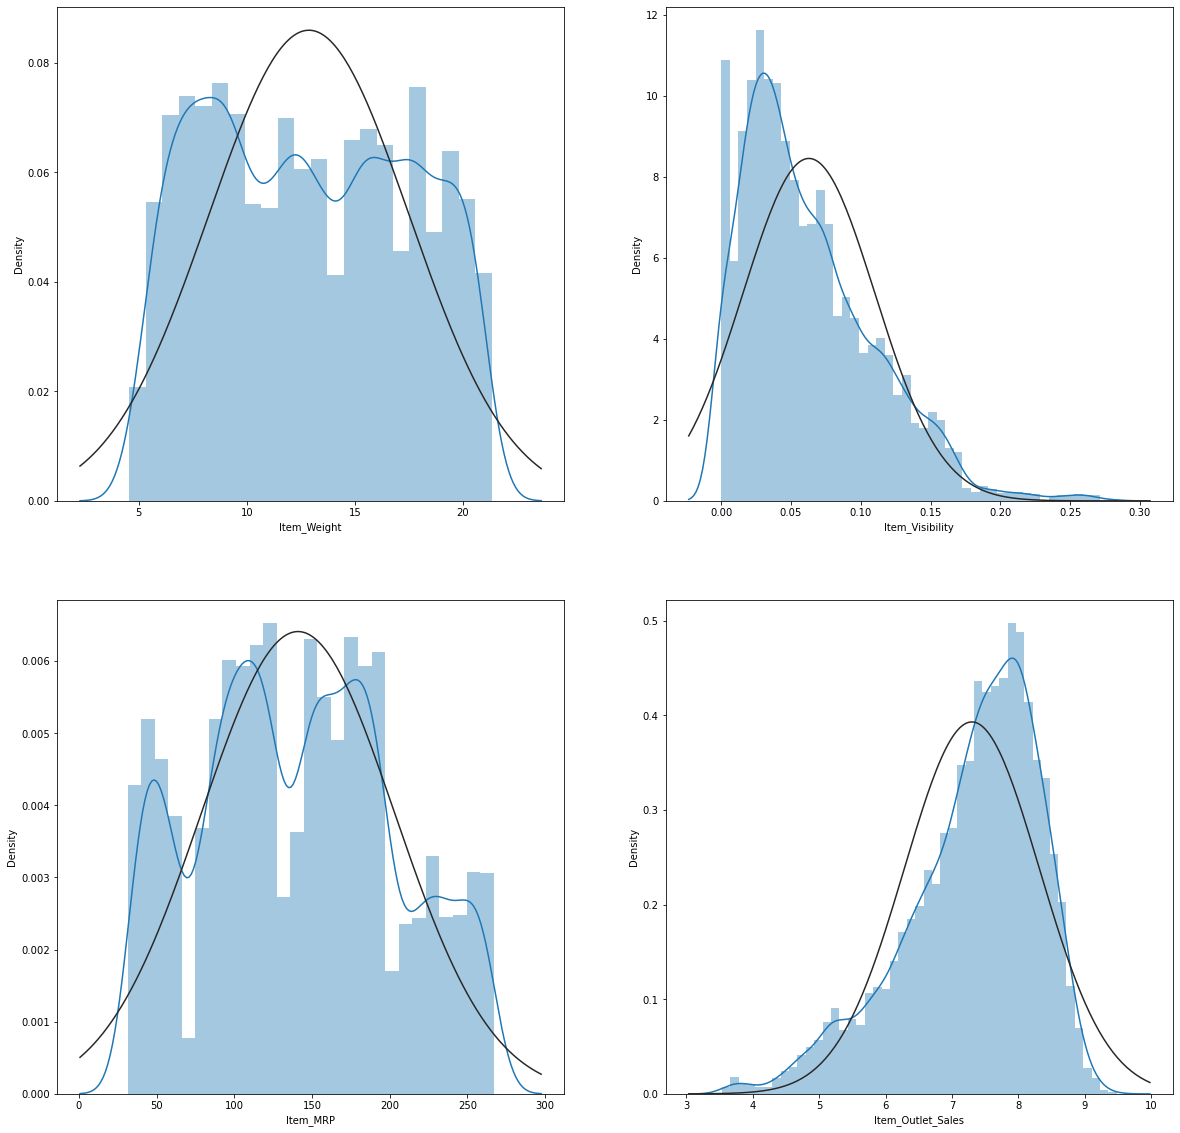

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20, 20))
ax=ax.flatten()
index=0
for i in num_cols:
    sns.distplot(df[i],fit=norm,ax=ax[index])
    index=index+1

In [94]:
for i in obj_cols:
    print(i)
    print(df[i].value_counts())

Item_Identifier
FDW13    10
FDG33    10
FDP25     9
NCF42     9
FDV60     9
         ..
FDO33     1
FDK57     1
FDY43     1
FDC23     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [93]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'reg':'Regular'})

In [96]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:2])

In [98]:
df['Item_Identifier'].replace({'FD':'Food','DR':'Drinks','NC':'Non_Consumable'})

0                 Food
1               Drinks
2                 Food
3                 Food
4       Non_Consumable
             ...      
8518              Food
8519              Food
8520    Non_Consumable
8521              Food
8522            Drinks
Name: Item_Identifier, Length: 8523, dtype: object

In [99]:
df[df['Item_Identifier']=='Non_Consumable']['Item_Fat_Content']='Non_Consumable'

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

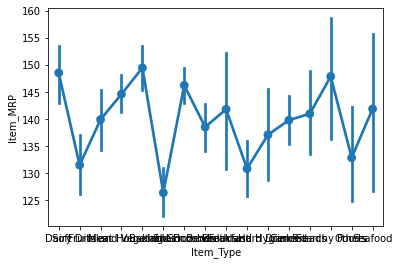

In [100]:
sns.pointplot(data=df,x='Item_Type',y='Item_MRP')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

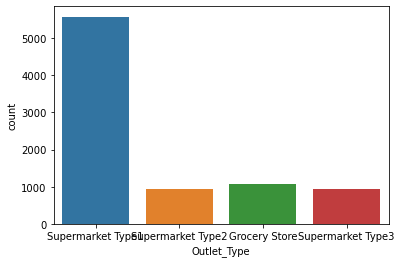

In [103]:
sns.countplot(df['Outlet_Type'])

In [106]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [113]:
obj_cols.remove('Item_Identifier')

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_cols:
    df[i]=le.fit_transform(df[i])
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

In [118]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,8.225808
1,0,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,6.096776
2,1,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,7.648868
3,1,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,6.597664
4,2,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,6.903451


<AxesSubplot:>

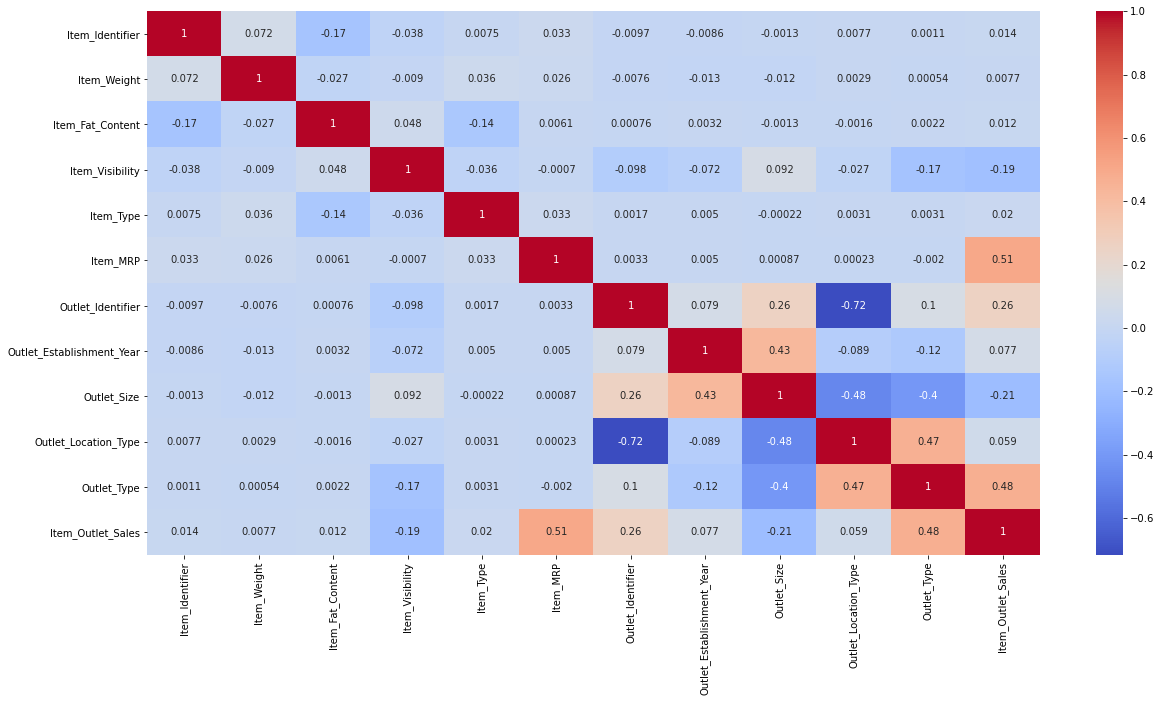

In [124]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [127]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [133]:
from sklearn .model_selection import train_test_split , cross_val_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [139]:
len(x_test)

2131

In [150]:
from sklearn.linear_model import LinearRegression
def classify(model):
    lr=model()
    lr.fit(x_train,y_train)
    cv_score=cross_val_score(lr,x_test,y_test, scoring='neg_mean_squared_error', cv=5)
    print("cv score : ", abs(cv_score.mean()))
    print("acuracy score : " ,lr.score(x_test,y_test))


In [157]:
from sklearn.tree import DecisionTreeRegressor
classify(LinearRegression)

cv score :  0.46903298608945426
acuracy score :  0.5560137610449807


In [158]:
classify(DecisionTreeRegressor)

cv score :  0.6186856475117659
acuracy score :  0.46845211553477717


In [160]:
from sklearn.ensemble import ExtraTreesRegressor
classify(ExtraTreesRegressor)

cv score :  0.3510347836271169
acuracy score :  0.674972879972541
